<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Hubei_new_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

In [3]:
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183


In [0]:
index_Hubei = cases[cases['Province/State'] == 'Hubei'].index[0]

In [0]:
Hubei_cases = cases.iloc[index_Hubei,4:]

In [6]:
Hubei_cases.head()

1/22/20     444
1/23/20     444
1/24/20     549
1/25/20     761
1/26/20    1058
Name: 154, dtype: object

In [0]:
Hubei_starting_date = '2020-01-22'

In [0]:
Hubei_new_cases = [t - s for s, t in zip(Hubei_cases, Hubei_cases[1:])]

In [9]:
Hubei_new_cases[:5]

[0, 105, 212, 297, 365]

In [0]:
Hubei_new_cases = pd.Series(Hubei_new_cases)

In [0]:
Hubei = pd.Series()
for i in np.arange(len(Hubei_new_cases)):
  Hubei[(pd.to_datetime(Hubei_starting_date) + pd.DateOffset(i+1)).strftime('%d-%m')] = Hubei_new_cases[i]

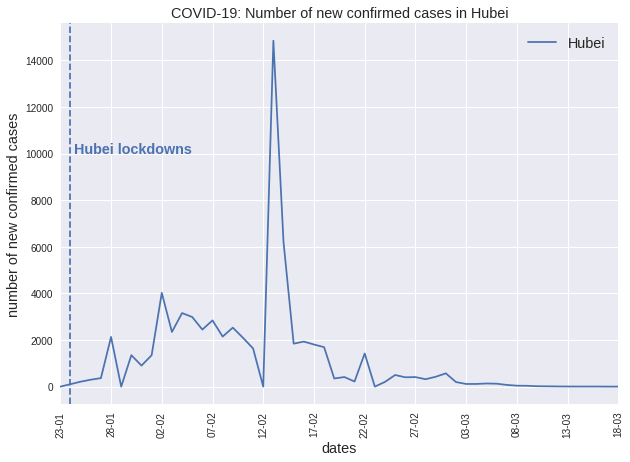

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(Hubei, label='Hubei')
ax.axvline(1, color='C0', linestyle='dashed')
ax.annotate(' Hubei lockdowns', (1, 10000.0), color='C0', fontsize='x-large', fontweight='bold')
ax.set_title(f'COVID-19: Number of new confirmed cases in Hubei', fontsize='x-large')
ax.set_xlabel(f'dates', fontsize='x-large')
ax.set_ylabel(f'number of new confirmed cases', fontsize='x-large')
ax.set_xticks(np.arange(len(Hubei)))
ax.legend(fontsize='x-large')
plt.xlim(0,30)
ax.set_xticks(np.arange(0,len(Hubei),5))
plt.xticks(rotation=90)
plt.savefig("2020-03-22-Hubei.png", format='png', dvi=500)

In [0]:
rolling = Hubei_new_cases.rolling(window=3)
rolling_mean = rolling.mean()

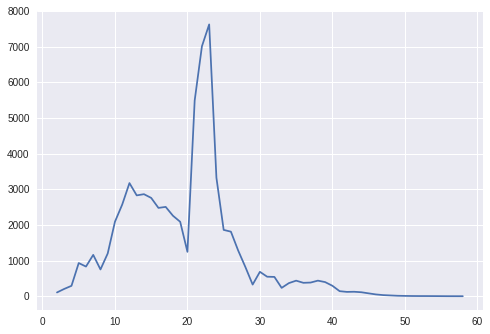

In [14]:
plt.plot(rolling_mean)